In [113]:
# load model

import joblib
from matplotlib import pyplot as plt

model=joblib.load('brain_tumor_kmeans.sav') # import model

tumorLabel=4 # brain tumor label for model

img_shape : (512, 512)
imgFlatten.shape : (262144, 1)


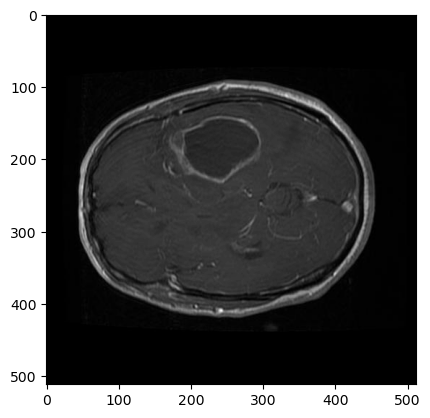

In [114]:
# flatten new image

import cv2

imagePath='test_images/0 (237).jpg' # get new image
img = cv2.imread(imagePath,0) # load image

height,width = img.shape
print('img_shape :',img.shape)

imgFlatten = img.reshape(height*width,1) # flattning
print('imgFlatten.shape :',imgFlatten.shape)

plt.imshow(img,cmap='gray')

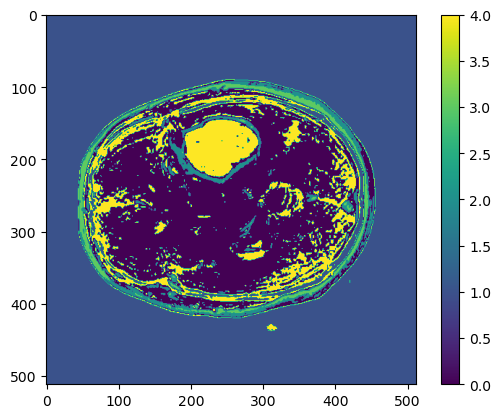

In [115]:
# get predictions

labels = model.predict(imgFlatten) # 1D array
labels2D = labels.reshape(height,width) # convert 1D to 2D

plt.imshow(labels2D) 
plt.colorbar()
plt.show()

In [116]:
# understanding numpy method before proceeding in the application

import numpy as np

array1 = np.array([423,5,64,4,3,6,5,3,5,5,343])
print('array1 :',array1)

array2 = (array1==5) # put only elements of array1 equal to 5 into array2
print('array2 :',array2)

array1 : [423   5  64   4   3   6   5   3   5   5 343]
array2 : [False  True False False False False  True False  True  True False]


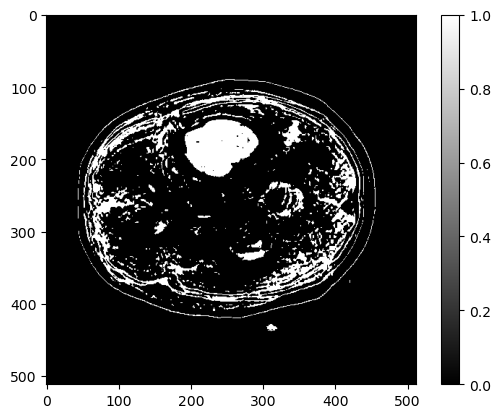

In [117]:
# pixels equal to tumorLabel in labels2D will be true (1). And other pixels will be false (0)
# true = 1 = white
# false = 0 = black

mask  = (labels2D==tumorLabel) # tumorLabel=4

plt.imshow(mask,cmap='gray')
plt.savefig('mask.png')
plt.colorbar()
plt.show()

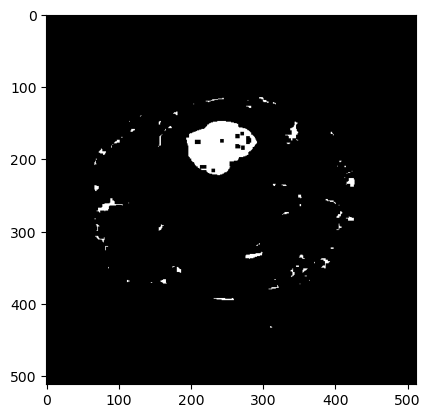

In [118]:
# we cannot process the above image as an image
# because the pixel range of that image is 0 and 1
# therefore, have to bring the image to a range of 0-255 as an accepted image
# also, this image should be converted to the datatype of the opencv image

tumorExtracted = np.array((mask*255),dtype=np.uint8) # converting the binary array into a opencv supported image

# apply morphological operation -> erosion / erode
kernel = np.ones((5,5),np.uint8)
tumorExtracted = cv2.erode(tumorExtracted, kernel, iterations=1) 

plt.imshow(tumorExtracted,cmap='gray')
plt.show()

In [119]:
# get original image (color image)

imgOriginal = cv2.imread(imagePath)
print(imgOriginal.shape)

(512, 512, 3)


In [120]:
# get number of contours

contours, hierarchy = cv2.findContours(tumorExtracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print('number of contours :',len(contours))
# cv2.drawContours(imgOriginal, contours, -1, (0,255,255),2) # drow contours

# post processing
# go to contours 677 for one by one
for cnt in contours:
    area = cv2.contourArea(cnt) # getting the area of the contour
    print(area)
    if(area>1000):
        cv2.drawContours(imgOriginal, [cnt], -1, (0,255,255),2) # drow contours
        x,y,w,h = cv2.boundingRect(cnt) # draw bouding rectangle
        cv2.rectangle(imgOriginal,(x,y),(x+w,y+h),(0,255,0),2) # color the bouding rectangle green
        cv2.rectangle(imgOriginal,(x,y),(x+120,y-40),(0,255,0),-1) # draw another green color rectangle
        cv2.putText(imgOriginal,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
    
cv2.imshow('LIVE',imgOriginal) # show image
cv2.waitKey(0)
cv2.destroyAllWindows()

number of contours : 85
1.5
30.5
8.5
0.0
0.0
0.0
3.0
0.0
24.0
0.0
13.0
14.5
24.0
0.0
0.5
3.0
0.0
38.0
14.0
86.5
3.0
0.5
0.5
0.5
15.5
15.5
6.0
5.5
0.0
26.0
8.0
18.5
0.0
2.0
0.0
9.0
143.5
10.5
25.0
4.0
4.0
73.5
0.0
0.0
0.0
0.0
1.0
0.0
1.5
3.5
0.0
28.5
0.0
0.0
0.0
3.0
15.0
0.0
0.0
13.5
0.0
2.5
0.0
9.5
5.5
130.0
4708.0
34.0
40.0
51.5
61.0
34.0
83.5
47.0
34.0
5.0
0.0
0.0
10.0
6.0
0.0
2.0
0.0
6.5
17.5
